# Region and Seasonal Variabilities (Figure 1)

## Importing

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

from tqdm import tqdm

import cmocean.cm as cm
import salishsea_tools.viz_tools as sa_vi


## Plotting (Regions)

In [2]:
def plot_shape_from_corners(bathy, corners, g):

    c = [(bathy.nav_lon[corners[0],corners[3]].values, bathy.nav_lat[corners[0],corners[3]].values), (bathy.nav_lon[corners[0],corners[2]].values, bathy.nav_lat[corners[0],corners[2]].values), 
        (bathy.nav_lon[corners[1],corners[2]].values, bathy.nav_lat[corners[1],corners[2]].values),(bathy.nav_lon[corners[1],corners[3]].values, bathy.nav_lat[corners[1],corners[3]].values)]
    
    x_coords, y_coords = zip(*c)
    x_coords = list(x_coords)
    y_coords = list(y_coords)
    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])

    plt.plot(x_coords, y_coords, linestyle='-', color = g)


## Plotting (Seasonal Variabilities)


In [3]:
def plotting(ds, quant, name, ax, labels, label1, label2, units):

    temp = ds[quant].mean(['y','x']).groupby(['time_counter.month', 'time_counter.day']).mean()
    temp = temp.to_numpy()
    temp = np.ravel(temp)
    ax.plot(labels, temp, label='mean')
    ax.fill_between((label1,label2), np.max(temp), alpha=0.3, color='grey')
    ax.set_ylabel(units, fontsize=11)
    ax.xaxis.set_tick_params(rotation=45, labelsize=11)
    ax.set_title(name, fontsize=12)
    ax.yaxis.set_tick_params(labelsize=11, labelcolor='tab:blue')

    temp = ds[quant].mean(['y','x']).groupby(['time_counter.month', 'time_counter.day']).std()
    temp = temp.to_numpy()
    temp = np.ravel(temp)
    ax2 = ax.twinx()
    ax2.plot(labels, temp, color='tab:orange', label='std')
    ax2.yaxis.set_tick_params(labelsize=11, labelcolor='tab:orange')
    
    ax.set_xticks(np.arange(0,len(labels),3))


## Regions

/tmp/ipykernel_2537239/3591187107.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=mycmap)


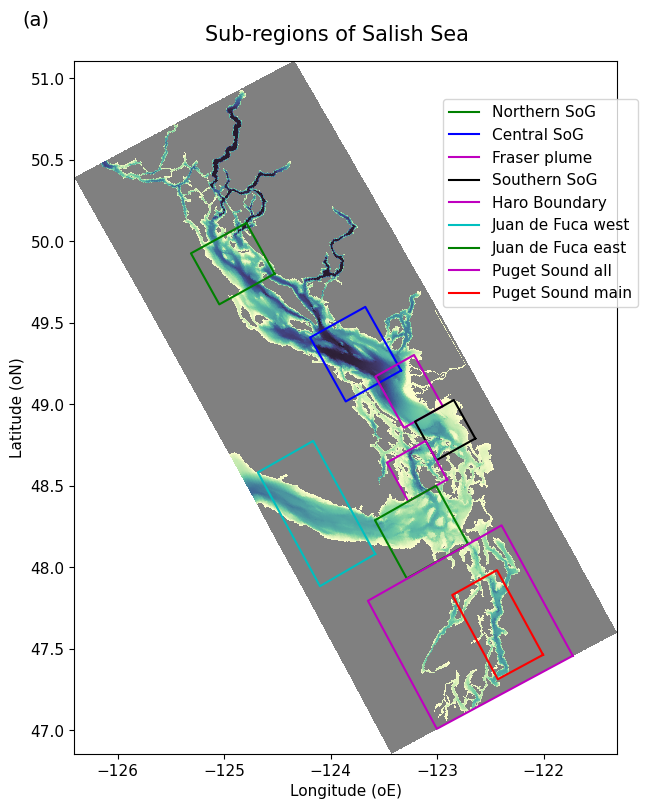

In [4]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

fig, ax = plt.subplots(1, 1, figsize=(7, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=mycmap)

ax.set_ylabel('Latitude (oN)', fontsize=11)
ax.set_xlabel('Longitude (oE)', fontsize=11)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)

fig.text(0.05, 0.92, '(a)', fontsize=14)
fig.suptitle('Sub-regions of Salish Sea', fontsize=15, x = 0.5, y=0.92)

SoG_north = [650, 730, 100, 200]
plot_shape_from_corners(bathy, SoG_north, 'g')

SoG_center = [450, 550, 200, 300]
plot_shape_from_corners(bathy, SoG_center, 'b')

Fraser_plume = [380, 460, 260, 330]
plot_shape_from_corners(bathy, Fraser_plume, 'm')

SoG_south = [320, 380, 280, 350]
plot_shape_from_corners(bathy, SoG_south, 'k')

Haro_Boundary = [290, 350, 210, 280]
plot_shape_from_corners(bathy, Haro_Boundary, 'm')

JdF_west = [250, 425, 25, 125]
plot_shape_from_corners(bathy, JdF_west, 'c')

JdF_east = [200, 290, 150, 260]
plot_shape_from_corners(bathy, JdF_east, 'g')

PS_all = [0, 200, 80, 320]
plot_shape_from_corners(bathy, PS_all, 'm')

PS_main = [20, 150, 200, 280]
plot_shape_from_corners(bathy, PS_main, 'r')

boxnames = ['Northern SoG','Central SoG','Fraser plume','Southern SoG', 'Haro Boundary', 'Juan de Fuca west', 'Juan de Fuca east', 'Puget Sound all', 'Puget Sound main']
boxes = [SoG_north,SoG_center,Fraser_plume,SoG_south,Haro_Boundary,JdF_west,JdF_east,PS_all,PS_main]
fig.legend(boxnames, loc=(0.67, 0.62), fontsize=11)

regions0 = np.full((len(bathy.y),len(bathy.x)),np.nan)

for i in range (0, len(boxnames)):
    regions0[boxes[i][0]:boxes[i][1], boxes[i][2]:boxes[i][3]] = i

regions0 = xr.DataArray(regions0,dims = ['y','x'])


## Seasonal Variabilities

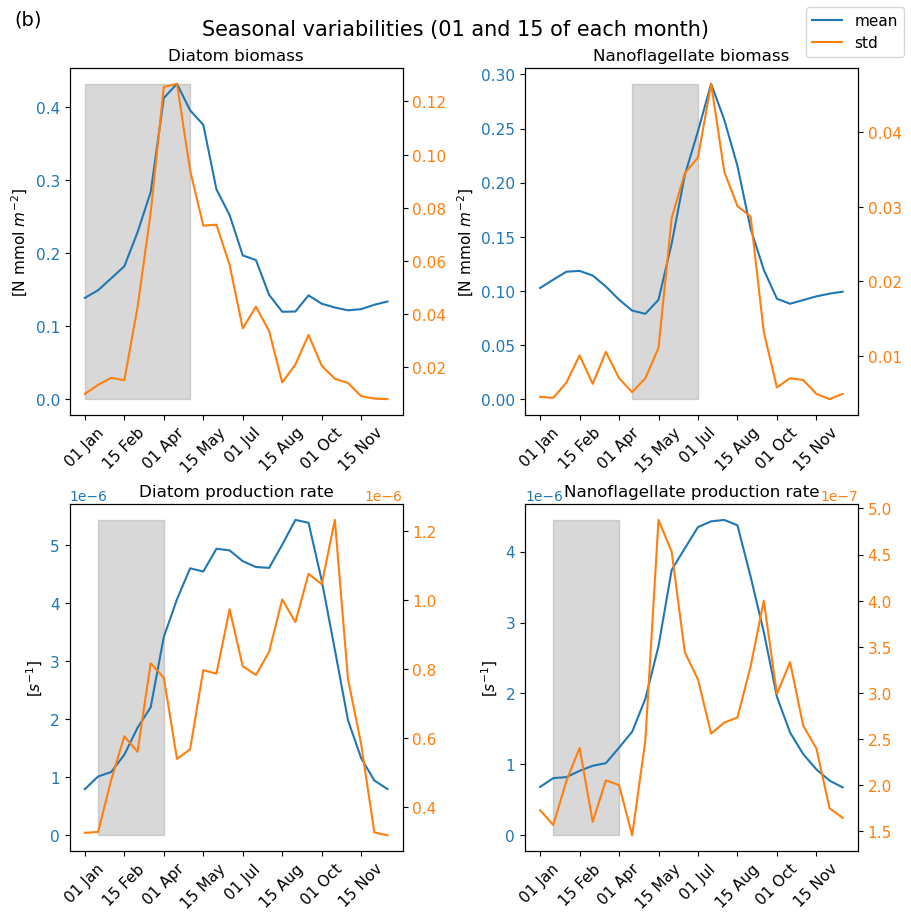

In [5]:
ds = xr.open_dataset('/data/ibougoudis/MOAD/files/seasonalities.nc')

labels = np.unique(ds.time_counter.dt.strftime('%d %b'))
indx_labels = np.argsort(pd.to_datetime(labels, format='%d %b'))
labels = labels[indx_labels]

fig, axs = plt.subplots(2,2, figsize=(9,9), layout='constrained')
fig.text(.01, .99, '(b)', fontsize=14)

plotting(ds, 'Diatom', 'Diatom biomass', axs[0,0], labels, labels[0], labels[8], '[N mmol $m^{-2}$]')

fig.suptitle('Seasonal variabilities (01 and 15 of each month)', fontsize=15)
fig.legend(fontsize=11)

plotting(ds, 'Flagellate', 'Nanoflagellate biomass', axs[0,1], labels, labels[7], labels[12], '[N mmol $m^{-2}$]')
plotting(ds, 'Diatom_Production_Rate', 'Diatom production rate', axs[1,0], labels, labels[1], labels[6], '[$s^{-1}$]')
plotting(ds, 'Flagellate_Production_Rate', 'Nanoflagellate production rate', axs[1,1], labels, labels[1], labels[6], '[$s^{-1}$]')

plt.show()
